# Facial Expression, Age, Gender and Race Recognition Using Python

#### Data Science project; Open University of Israel; 

#### Student: Leeoriya Sapir,               ID: 205906217

## The goal of this project

The goal of this project, and actually the problem I want to solve, is to successfully predict and detect four intresting details from only a face image: the expression, age, gender and the race of the one's face behing the image. There are a lot of uses I can think of that this idea can help with, and about them you can read more in the "Motiviation" section below.

A good solution, as I expected to achive, will perform high accuracy of those four detials I'd like the model to figure out from the face images. Maybe at the beggining it won't be able to predict the exact age, for example- which makes me think from now on that to perform a better solution- I might divided the age detail to some age groups. 

## Motivation

In this section I'll desribe why this problem and it's solution are important to be figured, what are the uses of this kind of solution etc.

It is a well-known fact that human beings are responsible for the depiction of six basic emotions: happiness, anger, surprise, sadness, fear, and disgust. Creating a model that can accurately classify these emotions can be extremely useful in a variety of areas such as image processing, cybersecurity, robotics, psychological studies, virtual reality applications, etc.

The main objective of this capstone is to categorize faces based on the emotion shown in the expression into one of seven categories (the six basic emotions plus one category for neutral). Moreover, to detect the age, gender and race of the face in the image. 

The model developed will be able to predict the facial emotion, age, race and gender on pictures. The main example I can think of is the new exams software of the Open University which developed to "keep an eye" on the student- but a vitual one. In this kind of way, using this solution for example, the sofware can detect some important things: first of all, if the race, age and gender are equals to the real student- as described in his\ her student card. Moreover, the system can analyze the student facial expression- and give insights about it- so the university can learn about the difficulty of questions which known as more difficult at home exams than class ones, and even about giving some factor (extra point for extra hard exam).

Some more real-world examples for this application are:

* Determining client’s medical state, for online medical services
* In the case of autism,helping to interpret expressions
* During healthcare treatments, determining the patients feeling and comfort level
* In e-learning, adjusting the learning technique according to the style of learner
* In the case of driving, determining fatigue and alerting in advance
* Advertising purposes
* Detect potential clients in malls
* And more.... 

## Tools: Technologies and Algorithms

In order to train the model, I'll use neural networks for the calssification of the age, race and gender. (CNN).

To explore the creation of features of the emotion detection, I'll use unsupervised techniques: PCA and LBP.

About the libraries, I will mostly use them (part of them now in the first phase of the project, the rest in the second and final phase):

* For the CNN part, I will use the *fastai* library that sits on top of *PyTorch*.

* For the statistical modeling including classification, regression, clustering and dimensionality reduction- I will use *sklearn* library.

* For the statistical data visualization, plot etc. I will use *seaborn* library.

* Moreover, I'm gonna use some of the most known and helpful libraries of python, such of *numpy* for arrays, *pandas* for some more manipulation and analysis on the data, *matplotlib* for some more visualization and graphical plotting, *shitil* for dealing with the dataset files, and some more as described in the libraries section below.

## The Data

I will use 2 different datasets:
    
<b> For the age, race and gender classification: </b>


1. https://susanqq.github.io/UTKFace/ 
<br/>
This is a large scale face dataset (consists of 20k+ face images). I will use the "Aligned&Cropped Faces" set.



<b> And for the emotion detection, I will use the Kaggle Facial Expression Recognition chanllenge data set: </b>


2. https://www.kaggle.com/ashishpatel26/facial-expression-recognitionferchallenge

#### Import relevant libraries

In [3]:
#impoting relevant libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import shutil
import IPython
import PIL.Image
#from PIL import Image
from PIL import ImageTk
from PIL import Image as PILImage
import time
import glob
from matplotlib.pyplot import imshow
import pickle

np.random.seed(42)

# Import fastai ext.

import fastai
from fastai.vision import * 
import fastai.vision as fav
from fastai.metrics import error_rate
from fastai.callbacks.hooks import *

# Import torch ext.

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import optim
from torchvision import transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from tqdm.autonotebook import tqdm

# Import sklearn ext.

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# NOTE for myself due to v2 bugs
fastai.__version__

'1.0.61'

## Loading the 1st dataset- UTK (for Age, Gender, Race)

<B> First, I will start with the UTK dataset. Description of this data set: </B>
* Labels of the picture are the filename of the picture given in the format of age_gender_race_timestamp.jpg
* Age range: between 0 and 116 (integer, indicating the actual age of the person in the photo)
* Gender: Binary-  Male-->0; Female-->1
* Race: White-->0; Black-->1; Asian-->2; Indian-->3; Hispanic/Latino/MiddleEast-->4
* Date & Time: date& time the image was collected to this dataset, in format: yyyymmddHHMMSSFFF

In [4]:
# First, unzip from .zip file
shutil.unpack_archive("C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\UTKface_Aligned&cropped-20210531T184028Z-001.zip", "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean")
os.chdir( "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean")

In [5]:
# Second, unzip from .tar.gz file
shutil.unpack_archive("C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\UTKFace.tar.gz", "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped")
os.chdir( "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped")

In [6]:
# Getting current working directory to get back to this directory easily
cwd=os.getcwd()
images_path='C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped\\UTKFace'

In [7]:
# Make sure I extracted it as well
path = "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped\\UTKFace"
files = os.listdir(path)
size = len(files)

print("Example for a file name:", files[0])
print("Total samples:", size)

Example for a file name: 100_0_0_20170112213500903.jpg.chip.jpg
Total samples: 23711


In [8]:
 # Efficient way of getting my results, and calculate the time take to change the names

os.chdir(images_path)
start = time.time()
map(lambda filename: filename.split('.')[0]+'.jpg', os.listdir(images_path))
elapsed_time_fl = (time.time() - start)
print('Time take to change the names of all the files: ', elapsed_time_fl)
#os.listdir(images_path)

Time take to change the names of all the files:  0.01499795913696289


In [9]:
# Getting back to the original cwd
os.chdir(cwd)

<b> Understand the dataset </b>

The propose of the following functions is to explore the set of images that has been acquired and to take them as a dataframe to understand the distribution better

In [74]:
# This function is to return the key of the inputed value, since there are three different dictionaries that I created
# I chose to write a function which can easily give me the corresponding key 

def get_value(dictionary, this_key): 
    '''
    Gives the value of a inputed key
    dictionary: Dictionary from where the key has to be searched
    this_key: key for which value is required
    '''
    for key, value in dictionary.items(): 
         if this_key==key: 
            return value 
def get_key(dictionary, this_value): 
    '''
    Gives the key of a inputed value
    dictionary: Dictionary from where the key has to be searched
    this_value: value for which key is required
    '''
    for key, value in dictionary.items(): 
         if this_value == value: 
                return key
        

gender_dict={0:'Male', 1:'Female'}
gender_map = dict((g, i) for i, g in gender_dict.items())
race_dict={0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}
race_map=dict((r, i) for i, r in race_dict.items())
        

In [75]:
def parse_filepath(filepath):
    '''
    This function is to parse the filepath into three labels age, gender and race
    '''
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), gender_dict[int(gender)], race_dict[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [76]:
files = glob.glob(os.path.join(images_path, "*.jpg"))
attributes = list(map(parse_filepath, files))

C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\39_1_20170116174525125.jpg.chip.jpg
C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\61_1_20170109142408075.jpg.chip.jpg
C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\61_1_20170109150557335.jpg.chip.jpg


*As we can see, we got 3 images with missing labels of race. So I changed them manually to:* 
* 39_1_20170116174525125.jpg --> 39_1_1_20170116174525125.jpg.chip.jpg
* 61_1_20170109142408075.jpg --> 61_1_1_20170109142408075.jpg.chip.jpg
* 61_1_20170109150557335.jpg --> 61_1_3_20170109150557335.jpg.chip.jpg

In [77]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.head()

,age,gender,race,file
0,100.0,Male,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean...
1,100.0,Male,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean...
2,100.0,Female,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean...
3,100.0,Female,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean...
4,100.0,Female,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean...


In [78]:
# The number of rows and columns 
df.shape

(23708, 4)

In [79]:
def label (plot):
    
    '''
    This function labels my count plots effectively
    '''
    for rect in plot.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

            # Create annotation
        plot.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.show()
sns.set(style="ticks", color_codes=True)   

<b> Now, lets understanding distribution using plots </b>

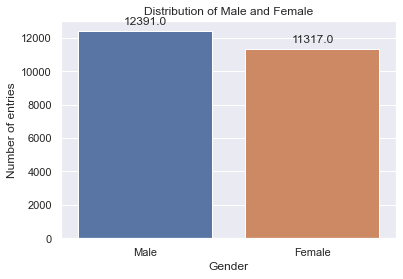

In [80]:
## Plot 1 --> Frequency of Gender

sns.set(rc={'figure.figsize':(6,4)})
plot = sns.countplot(x='gender', data = df)
plot.set_title('Distribution of Male and Female')
plot.set_xlabel('Gender')
plot.set_ylabel('Number of entries')
label(plot)

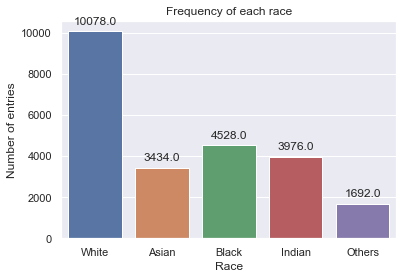

In [81]:
# Plot 2 --> Frequency of Races
sns.set(rc={'figure.figsize':(6,4)})
plot = sns.countplot(x='race', data = df)
plot.set_title('Frequency of each race')
plot.set_xlabel('Race')
plot.set_ylabel('Number of entries')
label(plot)

As we can see above, according to the race plot, most of our results may be biased to white- so I might not using this in the model, cause it might be an issue - the model might classify white people in a better accuracy than other races.

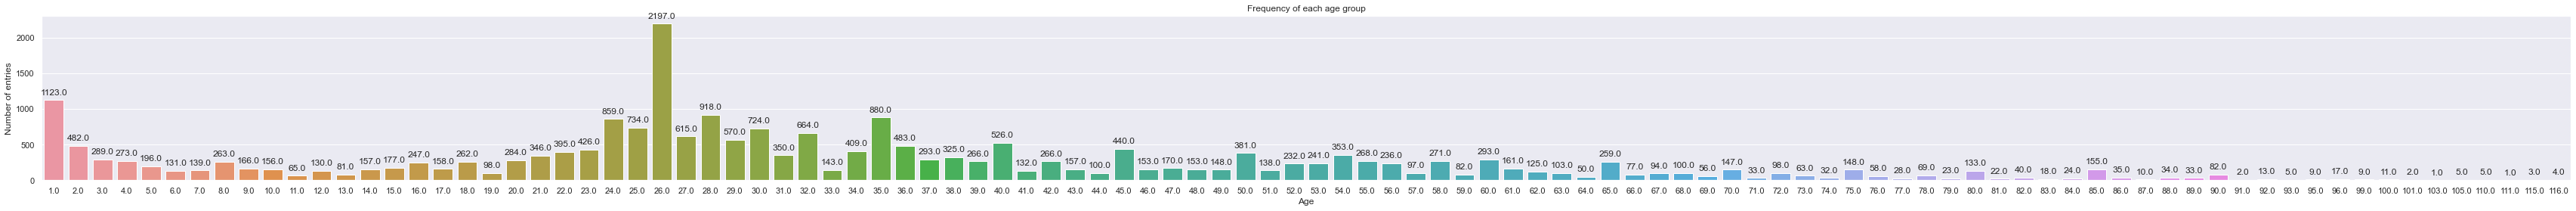

Max age: 116
Min age: 1


In [82]:
# Plot 3 --> Frequency of Ages
sns.set(rc={'figure.figsize':(60,4)})
plot = sns.countplot(x='age', data = df)
plot.set_title('Frequency of each age group')
plot.set_xlabel('Age')
plot.set_ylabel('Number of entries')
label(plot)
print("Max age: 116")
print("Min age: 1")

#### Classifiying Ages

<b>Due to the wide distribution, I decided to divide the files into age classes:</b>
    * 0 --> Ages 0-5
    * 1 --> Ages 6-10
    * 2 --> Ages 11-15
    * 3 --> Ages 16-20
    * 4 --> Ages 21-30
    * 5 --> Ages 31-40
    * 6 --> Ages 41-50
    * 7 --> Ages 51-60
    * 8 --> Ages 61-70
    * 9 --> Ages 70+

In [83]:
def age_label(age_value):
  
    #age_value: Age is taken as input to give a class from 0 - 9 according to the above cell
    
    if 0 <= age_value <= 5:
        age_value = 0
    elif 6 <= age_value <= 10:
        age_value = 1
    elif 11 <= age_value <= 15:
        age_value = 2
    elif 16 <= age_value <= 20:
        age_value = 3
    elif 21 <= age_value <= 30:
        age_value = 4
    elif 31 <= age_value <= 40:
        age_value = 5
    elif 41 <= age_value <= 50:
        age_value = 6
    elif 51 <= age_value <= 60:
        age_value = 7
    elif 61 <= age_value <= 70:
        age_value = 8
    else:
        age_value = 9
    return str(age_value)

<b> Now, to read the data, and divide it to train and test labels, I'll do the following: </b>

1.Listed all the filenames from the data folder

2.Randomised the images

3.Saved filenames into a text file

4.Saved labels into another text file spliting the data by '_'

5.Now, saved filenames into two different text files (train, test)

6.Saved filenames into two different text files (train_labels, test_labels)

In [84]:
# Function to write the contents to file
def writeToFile(contents, file):
    '''
    Writes contents of a given variable into the given filename
    contents: contents to be written into the file
    file: Name of the file that you would want to write the contents    
    '''
    with open(file, 'w') as f:
        for item in contents:
            f.write(item+'\n')

In [85]:
# function to split the label and store it in a file
def labelsToFile(labels, file):
    '''
    Writes contents of a given variable into the given filename
    contents: contents to be written into the file
    file: Name of the file that you would want to write the contents 
    '''
    with open(file, 'w') as f:
        for item in labels:
            temp_list=item.split('_')
            
            temp_list[0]=age_label(int(temp_list[0])) # New label for age
            # Ex: 25_1_3_xxxxx.jpg --> '413' is written [25 --> 4]
            f.write(temp_list[0]+temp_list[1]+temp_list[2]+'\n')

Now we got a multiclass-multioutput problem.
* To the Age criteria we have 10 labels (0-9)
* To the Gender criteria we have 2 labels (0/1)
* To the Race criteria we have 5 labels (0-4)
Which total its 100 outputs.

Here to eliminate multi-output problem and point it to a single target variable, we have taken new labelling from 0-99 and have given the new labelling the following way:
Permutaions from 000 - 914
Each class is replaced and given an integer in a sequence from 0 - 99
Ex: label-->'413', new_label--> 48,

In [86]:
# This code permutates and creates a new_dictionary with the old_lables as keys and new_labels as values
count=0
classes_dict={}
for i in range(10):
    for j in range(2):
        for k in range(5):
            #print(str(i)+str(j)+str(k)+':'+str(count))
            classes_dict.update({(str(i)+str(j)+str(k)+'\n'):count})
            count+=1

In [87]:
def final_labels(read_from, write_to):
    '''
    Reads label from a file and write new labels into another file
    read_from: File from which labels are to be read
    write_to: File to which the labels are to be written
    '''
    with open(read_from, 'r') as f:    
        with open(write_to, 'w') as f1:
            for line in f:
                f1.write(str(get_value(classes_dict, line))+'\n')

In [88]:
# All the dictionaries
age_dict={'0':'0-5', '1':'6-10', '2':'11-15', '3':'16-20', '4': '21-30', 
          '5':'31-40', '6':'41-50', '7':'51-60', '8':'61-70', '9': '70+'}
gender_dict={'0':'Male', '1':'Female'}
race_dict={'0':'White', '1':'Black', '2':'Asian', '3':'Indian', '4': 'Hispanic/Latino/Middle Eastern'}

Now, I'll divide 80% of the files to train, and the rest 20% to test:

In [89]:
# Processed followed, described above
filenames=os.listdir(images_path)
random.shuffle(filenames)
# Divided 80% of files to train, 20% to test
train=filenames[:int(len(filenames)*0.35)]
test=filenames[(int(len(filenames)*0.35)+1) : (int(len(filenames)*0.35)+int(len(filenames)*0.085))]
val=filenames[(int(len(filenames)*0.35)+int(len(filenames)*0.085))+1:(int(len(filenames)*0.35)+int(len(filenames)*0.085))+1001]

In [90]:
# Training image list and the Label list for each image
writeToFile(train, 'train_data.txt')
labelsToFile(train, 'train_labels.txt')

# Testing image list and the Label list for each image
writeToFile(test, 'test_data.txt')
labelsToFile(test, 'test_labels.txt')

# Validation image list and the label list for each image
final_labels('train_labels.txt', 'final_train.txt')
final_labels('test_labels.txt', 'final_test.txt')

<b> Now we have: </b> 
* Trainimages filesnames
* Trainimages labels
* Testimages filesnames
* Testimages labels

So now left to fo is to prepare our Datasets since this is some unique style of having label data and image data, we have to create a customized dataset. 
Most of the exist datasets in the web are already built, and her it was needed to creating a new customized dataset.

In [125]:
# Editing My DataLoader
class MyDataset(Dataset):
    
    def __init__(self, data_path, img_path, img_filename, label_filename, transform=None):
        
        '''
        data_path: path of the cwd, useful to get back to cwd
        image_path: path of images data folder
        image_filename: file containing filenames of images
        label_filename: file containing filenames of labels
        '''
        self.img_path = os.path.join(data_path, img_path)
        self.transform = transform
        self.train = train
        
        # reading img file from file
        img_filepath = os.path.join(data_path, img_filename)
        fp = open(img_filepath, 'r')
        self.img_filename = [x.strip() for x in fp]
        fp.close()
        # reading labels from file
        label_filepath = os.path.join(data_path, label_filename)
        fp = open(label_filepath, 'r')
        labels = [x.strip() for x in fp]
        labels= list(map(lambda el:int(el), labels))
        fp.close()
        self.label = labels

    def __getitem__(self, index):
        img = PILImage.open(os.path.join(self.img_path, self.img_filename[index]))
        img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
      
        label=self.label[index]
        
        return img, label
    def __len__(self):
        return len(self.img_filename)

#### Loading Torch Datasets


In [126]:
# cwd
data_path=os.getcwd()
# image data folder location
image_path=images_path

train_images='train_data.txt'
train_labels='final_train.txt'

test_images='test_data.txt'
test_labels='final_test.txt'

# Total output labels
num_labels=100

# batch size
batch_size=32

In [127]:
# Specify transforms using torchvision.transforms as transforms
# library
train_transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Test transformations does not need to have RandomHorizontal flip
test_transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [128]:
# Loader
train_dataset=MyDataset(data_path, image_path, train_images, train_labels, transform=train_transformations)
test_dataset=MyDataset(data_path, image_path, test_images, test_labels, transform=test_transformations)

In [129]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= 32, shuffle=True)

####  Random data samples with labels

<ipython-input-130-3dfbefd648db>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])


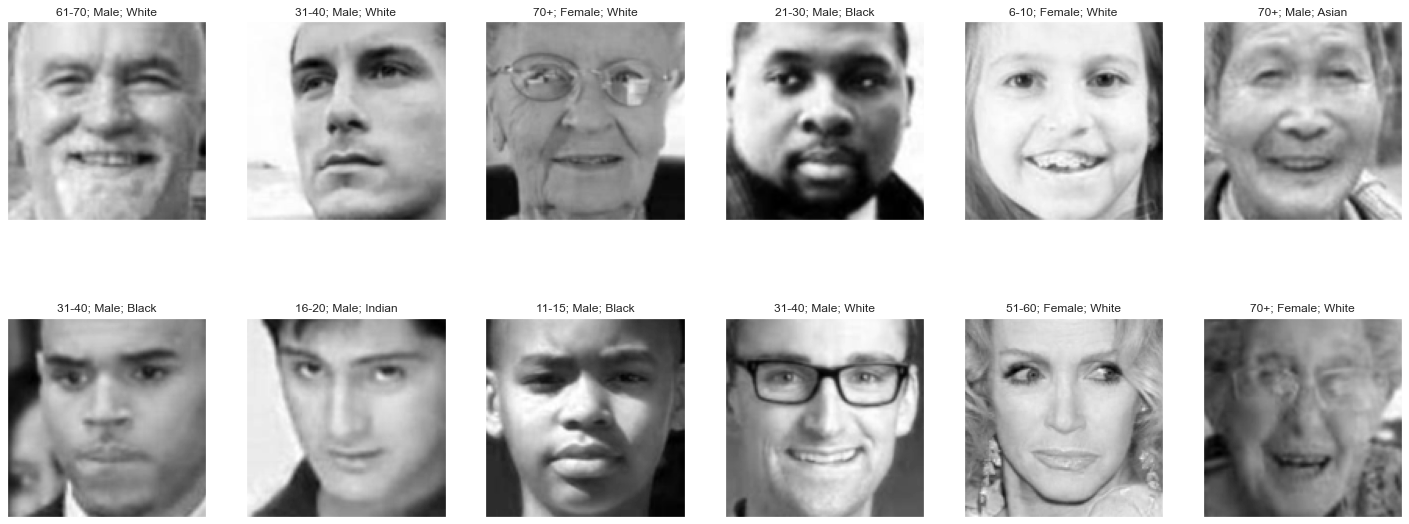

In [130]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))
plot_size=12
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx][0], cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    temp=list(get_key(classes_dict, int(labels[idx].item())))
    ax.set_title(get_value(age_dict, temp[0])+'; '+ get_value(gender_dict, temp[1])+'; '+ get_value(race_dict, temp[2]))

#### First results

In this section I will feed the dataset into a learner object using CNN as it seems as to be a classic easy model for image-classification problems, this with a pre-defined resnet34 model which fastai allows to use easily.

In [11]:
path = fav.Path('C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped\\UTKFace')
tfms = fav.get_transforms()
data_128 = (fav.ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed = 42)
        .label_from_func(extract_age_label)
        .transform(tfms, size = 128)
        .databunch(bs=256)
        .normalize(fastai.vision.imagenet_stats))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.45E-02


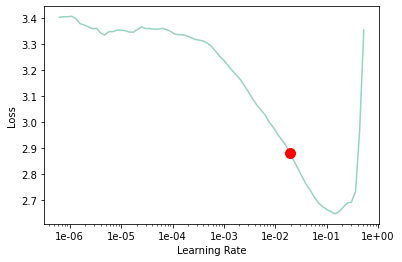

In [15]:
age_learner = fav.cnn_learner(data_128, fav.models.resnet34, metrics = [fav.error_rate , fav.accuracy])
age_learner.path = fav.Path('C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\modelsfas')
age_learner.lr_find()
age_learner.recorder.plot(suggestion = True)

As we can learn from the loss plot above,5e-2 seems to be the steepest but not the bottom yet and that's why I probably should pick it as our learning rate.
fastai provides the fit_one_cycle method- which I use in to start and train the model. Begin with 5 epochs =rounds of the model going over all of our data, pass it through the network, recalculate weights etc.

In [26]:
lr = 1e-1
age_learner.fit_one_cycle(5, slice(lr/2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.005582,0.979362,0.419532,0.580468,15:04
1,1.059575,1.160192,0.458975,0.541025,15:33
2,1.033361,0.972209,0.418688,0.581312,16:26
3,0.976157,0.925387,0.399283,0.600717,16:09
4,0.917572,0.914277,0.396963,0.603037,15:15


So in the table above, we can see our accuracy result for the age criteria. 
The results are not that bad for first attempt- starting with 58% and improving to 60% over ther epochs.
Althought this is pretty nice result for the firsts apochs- I might be able to improve it, which we will see later in this project. 


## Loading the 2nd dataset- FER (for Emotions)

<B> Second, I will continue with the kaggle FER dataset, to detect people's emotions from their face images. </B>

As we will see later, it consists on a .csv file with the class (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), the usage (training, validation or test set), and an array with the values of the pixels.

In [133]:
# import the .csv dataset
fer = pd.read_csv("C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\FER\\fer2013.csv", delimiter=',') 
fer.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [134]:
# count the training and test sets
fer["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [135]:
emotion_label_to_text = {
    0:'anger',
    1:'disgust',
    2:'fear',
    3:'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'}
emotion_counts = fer['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'amount']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_label_to_text)
emotion_counts

,emotion,amount
0,anger,4953
1,disgust,547
2,fear,5121
3,happiness,8989
4,sadness,6077
5,surprise,4002
6,neutral,6198


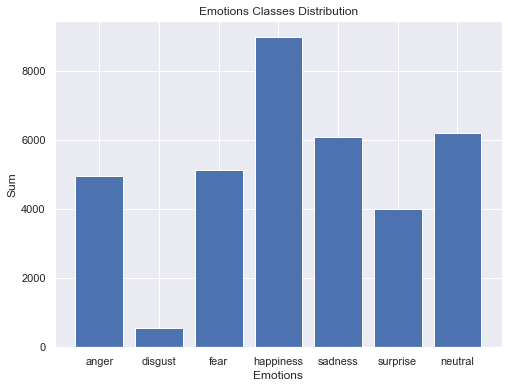

In [157]:
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.emotion, emotion_counts.amount)
plt.title('Emotions Classes Distribution')
plt.xlabel('Emotions')
plt.ylabel('Sum')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


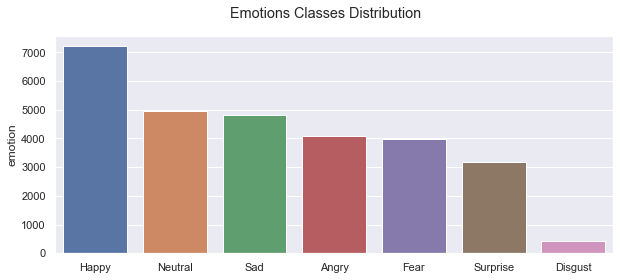

In [177]:
#Lets organize it better 
plt.figure(figsize=(10,4))
labels = ['Happy', 'Neutral', 'Sad', 'Angry', 'Fear','Surprise', 'Disgust']
plt.suptitle('Emotions Classes Distribution')
sns.barplot(labels, fer[fer['Usage'] == 'Training'].emotion.value_counts())
plt.show()

As we can see above, the biggest emotion amount is "happiness".  All of the other emotions are presented as well- about 4000-6000 of each, except the "disgust" emotion which barely have examples. Because of that, I might try and dispose some of the labels later on.

Now, it's time to combine both of the test sets- the private one and the public one.
As described in Kaggle- the FER2013 dataset contains three usages - each image is used for either "Training", "PublicTest", or "PrivateTest".
There are 2 test usages exist because the fact this dataset was used in a kaggle competition, in order to avoid overfitting. 

Lets look at the distribution of emotion-classes between our train and validation sets and make sure they are similar:


In [165]:
train_df = fer[fer['Usage'] == 'Training']
valid_df = fer[fer['Usage'] != 'Training']

In [166]:
valid_df['emotion'].value_counts(normalize=True) * 100

3    24.714405
4    17.372527
6    17.177487
2    14.265812
0    13.346336
5    11.577041
1     1.546392
Name: emotion, dtype: float64

In [167]:
train_df['emotion'].value_counts(normalize=True) * 100

3    25.131492
6    17.294228
4    16.823992
2    14.270786
0    13.915497
5    11.045317
1     1.518688
Name: emotion, dtype: float64

So, as I wanted to make sure- the percentages of each emotion class in our training set is very similar to our validation set.

In [7]:
# Indicate the paths for the two datasets (.csv and images)
path = 'C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\images_fer2013\\Training'
path2 = 'C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\FER\\fer2013.csv'
wd = '\kaggle\working' # Create a working directory to save files created

# Create ImageDataBunch (from fastai library)  
bs=128
np.random.seed(42)
tfms = get_transforms(max_rotate=20, max_zoom=1.1, max_lighting=0.4, max_warp=0.2, p_affine=1., p_lighting=1.1) #no transforms in valid set                      
data = ImageDataBunch.from_folder(path, train='.', valid_pct=.2, 
                                  test='../PrivateTest/', 
                                  ds_tfms=tfms, bs=bs)
data.normalize(imagenet_stats)

print(f'Number of images:\nTraining: {len(data.train_ds)}, Validation: {len(data.valid_ds)}, Test {len(data.test_ds)}')

Number of images:
Training: 22968, Validation: 5741, Test 3589


In [23]:
classes = data.classes
print(classes)

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


####  Random data samples with labels

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000002E23C8AF790>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1291, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


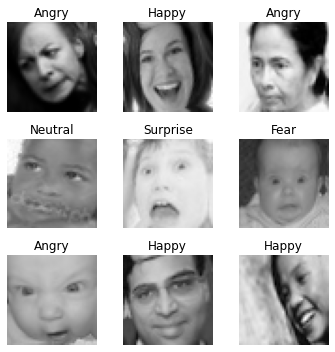

In [24]:
data.show_batch(rows=3, figsize=(5,5))

#### First results

Here, as I did before in the first data set, I will feed the dataset into a learner object using CNN as it seems as to be a classic easy model for image-classification problems, this with a pre-defined resnet34 model which fastai allows to use easily.
Also here I will begin with 5 epochs.

In [25]:
emotions_learner = fav.cnn_learner(data, fav.models.resnet34, metrics = [fav.accuracy, fav.error_rate])
emotions_learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.369769,1.855838,0.317540,0.682459,04:52
1,1.817671,1.693733,0.346630,0.653370,04:17
2,1.722584,1.624867,0.365790,0.634210,04:21
3,1.659677,1.569743,0.390698,0.609302,04:18
4,1.610816,1.557966,0.395750,0.604250,04:17


So in the table above, we can see our accuracy result for the emotion sets.
This time, the results can be a little bit disappointing- starting with 31.7%, but there is a silver lining- we an see a nice improvement over the epochs, almost 8% increase of accuracy, ending with 39.5%.

The results are not that bad for first attempt- but I might be able to improve it, which we will see later in this project. 

## Thoughts

So in this part of the project, which I also call phase1, I:
* Described the problem, the desired solution- and the great meaning of both
* Collecting and analyzing the primary part of the data sets
* Search and find which libraries I would probably use for this project
* Use and run algorithms on the datasets
* First attempt to analyze the first results we've got from the data and especially its accuracy
* And more that I might didnt mentioned here but can be found here.

Following in this project, I will try to  improve the accuracy of all the data sets and get better result by run some more epochs and more machine- learning algorithms.

Moreover, I will probably need to clean the data sets more to achieve my goal.

At the end of the project my will is to get to highest accuracy and test the model on data that I will collect by myself and will know it's actual details. 


# Phase 2

##### To continue, let's get to the analysis of the data;

Now I'll load the .cvs file and look at the data.

Further more, I'll do a little cleaning, removing duplicates if they exist.

In [8]:
# Load .csv file and remove duplicates
df_raw = pd.read_csv(path2)
df_raw.drop_duplicates(subset='pixels', keep = False, inplace = True) 
df_raw.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Let's see how many images of each class we have in the training set:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


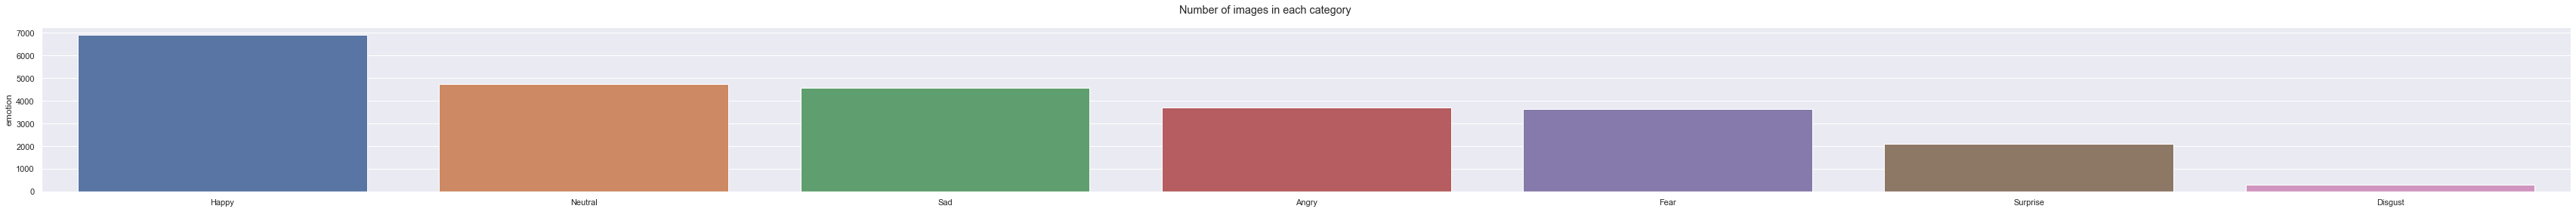

In [139]:
# plt.figure(figsize=(10,4))
labels = ['Happy', 'Neutral', 'Sad', 'Angry', 'Fear','Surprise', 'Disgust']
plt.suptitle('Number of images in each category')
sns.barplot(labels, df_raw[df_raw['Usage'] == 'Training'].emotion.value_counts())
plt.show()

As we can see, we have class imbalance, which is especially pronounce in the category 'Disgust'. 

To handle it, let's move to the pre-proccessing level.

## Supervised Learning Models and Feature Extraction

Following your (Idan's) email: 

in this part I'll do a compration between some models (include random forest) and CNN.

##### Pre-processing the data

In [9]:
# Pixels in array 
df_raw['pixels'] = df_raw['pixels'].apply(lambda im: np.fromstring(im, sep=' '))

# Separate train and validation set
df = df_raw[['emotion', 'pixels']][df_raw['Usage'] == 'Training']
df.head()

,emotion,pixels
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...."
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111..."
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161..."
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...."
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


To avoid the class imbalance and because of the long expected time run- (consider in 23K+ images),
I'll select only 100 images of each class for the training set and 50 in the validation set.

To do that, we will first shuffle the dataframe and then split it, getting the right amount of images from each class.

In [10]:
# Create empty dataframes
df_train = pd.DataFrame()
df_valid = pd.DataFrame()


# Shuffle and split
random.seed(42)
df = shuffle(df, random_state=42)
for i in range(7):
    df_train = df_train.append(df[df.emotion == i][0:100])
    df_valid = df_valid.append(df[df.emotion == i][100:150])

We can now separate the train and validation set in X and y.

In [11]:
# Scale and define train and valid X and y
X_train = np.vstack(df_train['pixels'].values)/255 
y_train = np.array(df_train['emotion'])

X_valid = np.vstack(df_valid['pixels'].values)/255 
y_valid = np.array(df_valid['emotion'])

Now let's take a look on the number of elements of each class in both the training& validation set to make sure everything worked as expected:

In [79]:
print('Train: ', X_train.shape)
print('Valid: ', X_valid.shape)

Train:  (700, 2304)
Valid:  (350, 2304)


##### The models

We will be running Random Forest (Random forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time; Wikipedia) , and SVC in different scenarios.
All the models will be tuned with GridSearchCV to get the optimum hyperparameters.

First- I'll run the models in our reduced dataset without further transformations.

In [13]:
# Define a function to print the models' results
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def print_results(model, X_train, X_valid, y_pred):
    print('Train set score:\t\t', round(model.score(X_train, y_train),2))
    print('Best cross validation score:\t', round(model.best_score_,2))
    print('Validation set score:\t\t', round(model.score(X_valid, y_valid),2))
    print(classification_report(y_valid, y_pred))
    conf_mat = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(5,5))
    fig = sns.heatmap(conf_mat, annot=True, cbar=False, cmap='mako_r', xticklabels=classes, yticklabels=classes)
    
    plt.suptitle('Confusion Matrix')
    fig.set_ylabel('Actual')
    plt.xlabel('Predicted')    
   
    plt.show()

#### Random forest: 

Train set score:		 1.0
Best cross validation score:	 0.23
Validation set score:		 0.25
              precision    recall  f1-score   support

           0       0.29      0.22      0.25        50
           1       0.38      0.36      0.37        50
           2       0.16      0.14      0.15        50
           3       0.27      0.20      0.23        50
           4       0.28      0.40      0.33        50
           5       0.23      0.22      0.22        50
           6       0.15      0.20      0.17        50

    accuracy                           0.25       350
   macro avg       0.25      0.25      0.25       350
weighted avg       0.25      0.25      0.25       350



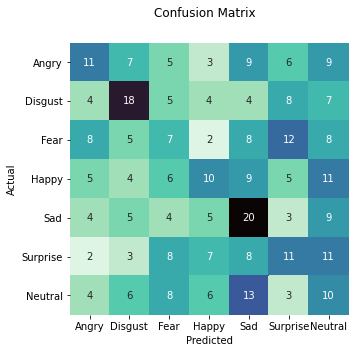

In [23]:
params = {'iid': True,
          'n_estimators': 50,
          'max_depth': 10}

param_grid = {'n_estimators': [50, 200, 300],
             'max_depth': [10, 20, 30]}

# Initialize and fit the model
rfc = RandomForestClassifier(random_state=42)
grid_rfc = GridSearchCV(rfc, param_grid, return_train_score=False, n_jobs=-1, cv=3)
grid_rfc.fit(X_train, y_train)

# Print results
y_pred = grid_rfc.predict(X_valid)
print_results(grid_rfc, X_train, X_valid, y_pred)

# Save score
rfc1_score = grid_rfc.score(X_valid, y_valid)

##### Random forest model result: 
NOT GOOD. Random forest is not the right model to use in this case, but I'll be running them for comparison and learning proposes.

### SVC: 

Train set score:		 0.95
Best cross validation score:	 0.22
Validation set score:		 0.25
              precision    recall  f1-score   support

           0       0.15      0.12      0.13        50
           1       0.35      0.38      0.36        50
           2       0.30      0.28      0.29        50
           3       0.24      0.26      0.25        50
           4       0.17      0.22      0.19        50
           5       0.33      0.32      0.32        50
           6       0.23      0.20      0.21        50

    accuracy                           0.25       350
   macro avg       0.25      0.25      0.25       350
weighted avg       0.25      0.25      0.25       350



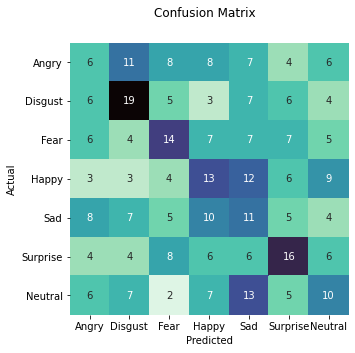

In [14]:
params = {'gamma': 'auto',
          'kernel': 'linear',
           'C': 100}

param_grid = {'C': [.1, 1, 10]}

# Initialize and fit the model
svc = SVC(**params, random_state=42)
grid_svc = GridSearchCV(svc, param_grid, return_train_score=False, n_jobs=-1, cv=3)
grid_svc.fit(X_train, y_train)

# Print Results
y_pred = grid_svc.predict(X_valid)
print_results(grid_svc, X_train, X_valid, y_pred)

# Save score
svc1_score = grid_svc.score(X_valid, y_valid)

##### SVC model result:
NOT GOOD, again.

Obviously, it's not what I expected for. But, to keep forward, I'll create features and see if our accuracies increase or decrease.

## Features creating with PCA

Similiar to what wev'e learn at chapter 8 in the course- visual data analysis (and especially given that I took this chapter for the presentation task)- there are some ways of creating featurs from images.

One of them is to generate Eigenfaces out of the images.

It simply consist on applyimg Principal Component Analysis (PCA) to our pictures. Before applying PCA we should align the eyes and mouths in every picture- but I won't do this because our pictures are pretty aligned. Also, in this first part of the capstone, we are not focused on the results, but on learning how to work with images and extract features.

Next, I'll perform PCA for 350 components;

If we represent the mean of all the components, we get a sort of mean face (extrictely speaking, mean face would be the mean of all the images in the dataset).

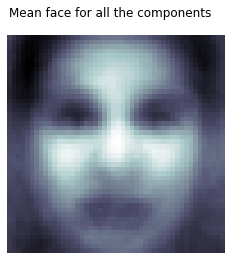

In [29]:
#Perform PCA
pca = decomposition.PCA(n_components=350)
pca.fit(X_train)

# Plot mean face
plt.imshow(pca.mean_.reshape(48,48),cmap=plt.cm.bone)
plt.suptitle('Mean face for all the components')
plt.axis('off')
plt.show()

This pic is definetely reminds us of a face. Let's extract some more samples of Eigenfaces:

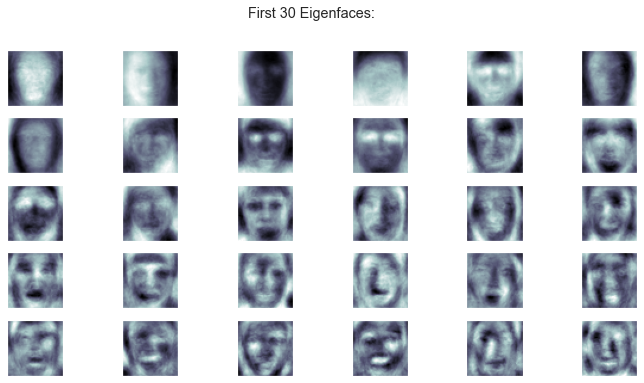

In [159]:
# Plot Eigen Faces
Eigenfaces = pca.components_[0:30]
fig = plt.figure(figsize=(12, 6))

for i in range(30):
    plt.subplot(5, 6, i + 1, xticks=[], yticks=[])
    plt.imshow(Eigenfaces[i].reshape(48,48), cmap=plt.cm.bone)

fig.suptitle('First 30 Eigenfaces:')
plt.show()

From the samples above, we can see A great way of visualizing the Eigenfaces is to see how they change the mean face when we vary the weight of one component.

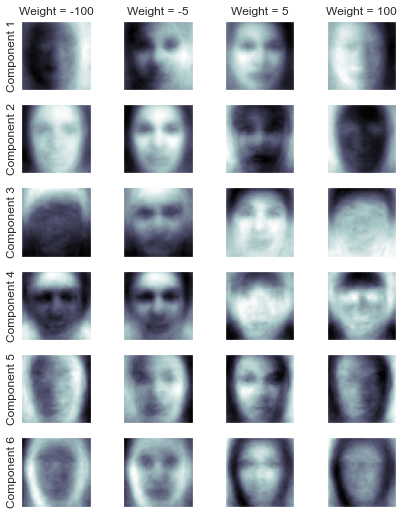

In [160]:
# Plot mean face changing the weight of one component at a time
fig = plt.figure(figsize=(7, 12))
weights = [-100, -5, 5, 100]
n = 1
for j in range(1, 7):
    for i in range(len(weights)):
        ax = plt.subplot(8,4,n, xticks=[], yticks=[])
        if n in range(1,5):
            ax.title.set_text('Weight = '+ str(weights[i]))
        if n in range(1,36,4):
            ax.set_ylabel('Component '+ str(j))
        plt.imshow(np.add(pca.mean_.reshape(48,48), (Eigenfaces[j].reshape(48,48)) * weights[i]) 
                   ,cmap=plt.cm.bone)
        n += 1

Describing the components:

The first one detect the skin tone and the next lighting effects: top, bottom, sides, corner...

The following components start focusing on features: eyes, smiles, frowns...

In the following chart, we can see the amount of variance explained by the corresponding number of components.

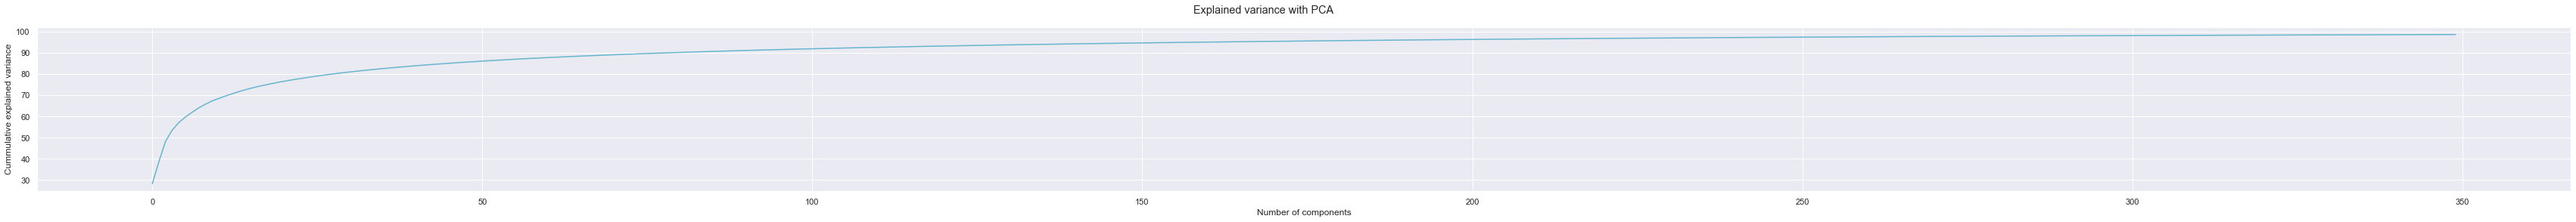

In [167]:
# Plot change of explained variance with #components 
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100., color='c')
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.suptitle('Explained variance with PCA')
plt.show()

** Double tap on the chart above for zooming in.

If we keep 150 components, we get over 90% of the variance

So now transform X_train and X_valid:

In [30]:
# Transform sets
X_train_pca = pca.transform(X_train)[:,:150]
X_valid_pca = pca.transform(X_valid)[:,:150]



#### PCA and Random Forest

After we got our not-that-good results with the original Random Forest model,
now let's run it on the PCA features we just created.

Train set score:		 1.0
Best cross validation score:	 0.23
Validation set score:		 0.23
              precision    recall  f1-score   support

           0       0.10      0.04      0.06        50
           1       0.37      0.38      0.38        50
           2       0.19      0.12      0.15        50
           3       0.23      0.30      0.26        50
           4       0.21      0.22      0.21        50
           5       0.27      0.34      0.30        50
           6       0.15      0.20      0.17        50

    accuracy                           0.23       350
   macro avg       0.22      0.23      0.22       350
weighted avg       0.22      0.23      0.22       350



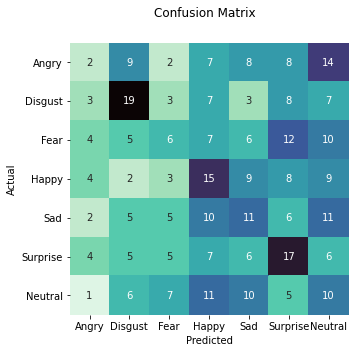

In [32]:
grid_rfc.fit(X_train_pca, y_train)
y_pred = grid_rfc.predict(X_valid_pca)
print_results(grid_rfc, X_train_pca, X_valid_pca, y_pred)

# Save score
rfc2_score = grid_rfc.score(X_valid_pca, y_valid)

Looks like it's gonna be a long trial and error project- but I'll keep trying. 


#### PCA and SVC

Train set score:		 0.71
Best cross validation score:	 0.23
Validation set score:		 0.26
              precision    recall  f1-score   support

           0       0.16      0.12      0.14        50
           1       0.35      0.38      0.37        50
           2       0.32      0.28      0.30        50
           3       0.19      0.24      0.21        50
           4       0.22      0.30      0.26        50
           5       0.33      0.32      0.32        50
           6       0.22      0.16      0.18        50

    accuracy                           0.26       350
   macro avg       0.26      0.26      0.25       350
weighted avg       0.26      0.26      0.25       350



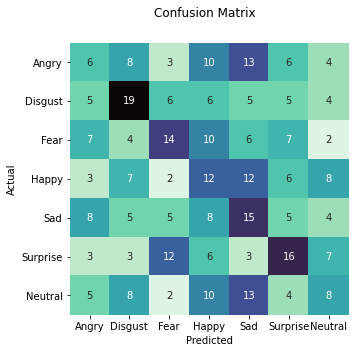

In [34]:
grid_svc.fit(X_train_pca, y_train)
y_pred = grid_svc.predict(X_valid_pca)
print_results(grid_svc, X_train_pca, X_valid_pca, y_pred)

# Save score
svc2_score = grid_svc.score(X_valid_pca, y_valid)

As we can see, the results are not satisfying. 

So, I lookes for another technique to extract features.
I found that there is a technique named LBP- Local binary patterns.
It's also look pretty similar to what wev'e learned in chapter 8, so I digged about that. 

In this capstone, I'll use LBP to filter the features of facial textures.
LBP transforms image blocks into an array of labels. Such labels (or their statistics, for example histograms) are used as features.

###### Description of my expected work with this technique:
* In the basic version of the LBP I'll consider the values of a 3x3 pixel neighborhood.
* For each pixel in a cell, compare the pixel to each of its 8 neighbors (on its left-top, left-middle, left-bottom, right-top, etc.).
* Follow the pixels along a circle, i.e. clockwise or counter-clockwise.
* Where the center pixel's value is greater than the neighbor's value, write "0".
* Otherwise, write "1".
* This gives an 8-digit binary number (which is usually converted to decimal for convenience).

## Features extraction with LBP

In [17]:
def lbp(img):
    patterns = []
    pixels = img
    width = 48
    height = 48
    pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

    # Calculate LBP for each non-edge pixel
    for i in range(1, height - 1):
        # Cache only the rows we need (within the neighborhood)
        previous_row = pixels[i - 1]
        current_row = pixels[i]
        next_row = pixels[i + 1]

        for j in range(1, width - 1):
            # Compare this pixel to its neighbors, starting at the top-left pixel and moving
            # clockwise, and use bit operations to efficiently update the feature vector
            pixel = current_row[j]
            pattern = 0
            pattern = pattern | (1 << 0) if pixel < previous_row[j-1] else pattern
            pattern = pattern | (1 << 1) if pixel < previous_row[j] else pattern
            pattern = pattern | (1 << 2) if pixel < previous_row[j+1] else pattern
            pattern = pattern | (1 << 3) if pixel < current_row[j+1] else pattern
            pattern = pattern | (1 << 4) if pixel < next_row[j+1] else pattern
            pattern = pattern | (1 << 5) if pixel < next_row[j] else pattern
            pattern = pattern | (1 << 6) if pixel < next_row[j-1] else pattern
            pattern = pattern | (1 << 7) if pixel < current_row[j-1] else pattern

            patterns.append(pattern)

    return patterns

Some examples of the image transformation:

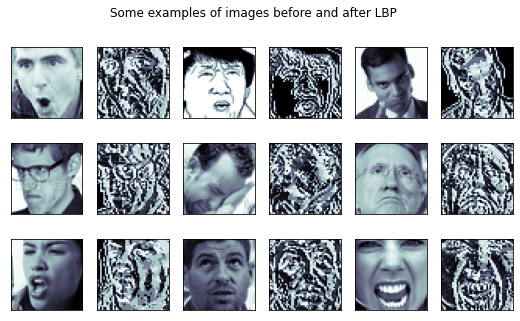

In [18]:
# Transform X_train 
X_train_lbp = pd.DataFrame()
for i in range(len(X_train)):
    X_train_lbp[i] = np.array(lbp(X_train[i]))

# Plot examples
plt.figure(figsize=(9,5))
plt.suptitle('Some examples of images before and after LBP')
for i in range(1,18,2):
    plt.subplot(3,6,i, xticks=[], yticks=[])
    plt.imshow(X_train[i].reshape(48,48), cmap=plt.cm.bone)
    plt.subplot(3,6,i+1, xticks=[], yticks=[])
    plt.imshow(np.array(X_train_lbp[i]).reshape(46,46), cmap=plt.cm.bone)

Now, as I did with the others, I'll transform X_valid to run 3 models:

In [20]:
# Transform X_valid
X_valid_lbp = pd.DataFrame()
for i in range(len(X_valid)):
    X_valid_lbp[i] = np.array(lbp(X_valid[i]))

#### LBP and Random Forest

Train set score:		 1.0
Best cross validation score:	 0.21
Validation set score:		 0.2
              precision    recall  f1-score   support

           0       0.19      0.22      0.21        50
           1       0.27      0.26      0.26        50
           2       0.12      0.10      0.11        50
           3       0.19      0.26      0.22        50
           4       0.26      0.24      0.25        50
           5       0.17      0.16      0.17        50
           6       0.20      0.18      0.19        50

    accuracy                           0.20       350
   macro avg       0.20      0.20      0.20       350
weighted avg       0.20      0.20      0.20       350



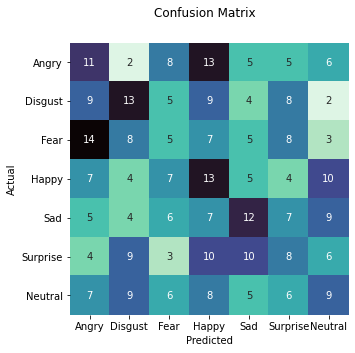

In [36]:
grid_rfc.fit(X_train_lbp.T, y_train)
y_pred = grid_rfc.predict(X_valid_lbp.T)
print_results(grid_rfc, X_train_lbp.T, X_valid_lbp.T, y_pred)

# Save score
rfc3_score = grid_rfc.score(X_valid_lbp.T, y_valid)

#### LBP and SVC


Train set score:		 1.0
Best cross validation score:	 0.19
Validation set score:		 0.21
              precision    recall  f1-score   support

           0       0.20      0.24      0.22        50
           1       0.26      0.24      0.25        50
           2       0.21      0.18      0.20        50
           3       0.26      0.28      0.27        50
           4       0.14      0.14      0.14        50
           5       0.21      0.24      0.23        50
           6       0.21      0.18      0.19        50

    accuracy                           0.21       350
   macro avg       0.21      0.21      0.21       350
weighted avg       0.21      0.21      0.21       350



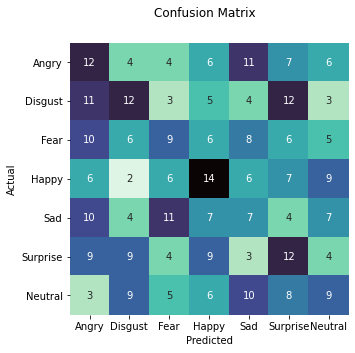

In [21]:
grid_svc.fit(X_train_lbp.T, y_train)
y_pred = grid_svc.predict(X_valid_lbp.T)
print_results(grid_svc, X_train_lbp.T, X_valid_lbp.T, y_pred)

# Save score
svc3_score = grid_svc.score(X_valid_lbp.T, y_valid)

Now let's comapre all the models above.

### Model Comparison


In [38]:
print('\t Random Forest\t\tSVC')
print(f'\t\t{round(rfc1_score,2)}\t\t{round(svc1_score,2)}\t\t')
print(f'PCA\t\t{round(rfc2_score,2)}\t\t{round(svc2_score,2)}\t\t')
print(f'LBP\t\t{round(rfc3_score,2)}\t\t{round(svc3_score,2)}\t\t')

	 Random Forest		SVC
		0.25		0.25		
PCA		0.23		0.26		
LBP		0.2		0.21		


As we can see from the comparison, all of the models ovefitted and had low accuracy, which was expected, since these models are probably not good with images.

So, I thought about another solution for this case. 
I'll use from now on in CNNs- Convolutional Neural Networks.
It might be the right tool to use when working with image classification.

If we need to rank the models above, 
then SVC after PCA.

We could try to use that model to separate only two categories, instead of 7. It'd probably performs much better. But, for the moment, let's put that in the bucket list and focus on CNNs.

## CNNs- Convolutional Neural Networks

#### First: Data Augmentation

Data augmentation is a technique used to virtually create more instances of the pictures. Every time the CNN grabs an image, it will be slightly different. For humans, they will look the same pictures, but for the computer it is like a brand new one. This helps fighting class imbalance.

The transformations will slightly change:

* Rotation
* Zoom
* Lighting
* Warp
* Padding
The pictures may also be flipped horizontaly.

These are some samples of the same picture after the transformations are applied:

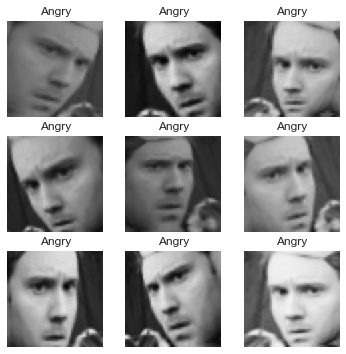

In [180]:
# Visualize data augmentation
def _plot(i,j,ax):
    x,y = data.train_ds[0]
    x.show(ax, y=y)
plot_multi(_plot, 3, 3, figsize=(6,6))

#### Pretrained models

Transfer learning is a popular method in computer vision because it allows us to build accurate models in a timesaving way. Instead of starting the learning process from scratch, we can start from patterns that have been learned when solving a different problem.

In computer vision, transfer learning is usually expressed through the use of pre-trained models. A pre-trained model is a model that was trained on a large benchmark dataset to solve a problem similar to the one that we want to solve.

### VGG-19

##### A short description about this architecture:
VGG-19 is a convolutional neural network that is 19 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database . The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

(Thanks to "https://www.mathworks.com/").

Let's try VGG-19, that has been succesfully use for facial and emotion recognition in the past:

In [16]:
# Load model
np.random.seed(42)
learn = cnn_learner(data, models.vgg19_bn, metrics=accuracy, model_dir='/tmp/model/', pretrained=True) 

#### Train the model
Since our model was previously trained- now only left to train last layers for our particular dataset.

In [17]:
learn.fit_one_cycle(10) 

epoch,train_loss,valid_loss,accuracy,time
0,2.521869,1.811719,0.323114,12:30
1,1.948821,1.673980,0.338443,11:12
2,1.734565,1.637775,0.361261,11:08
3,1.668108,1.558943,0.398363,11:07
4,1.607106,1.497691,0.420484,11:07
5,1.534333,1.435191,0.448877,11:11
6,1.498261,1.409017,0.452012,11:02
7,1.467294,1.389128,0.465947,11:02
8,1.438603,1.379352,0.464727,11:02
9,1.437537,1.374179,0.470301,11:04


Now I'll adjust the learning rate and run again for some more epochs, For fine tunning. To do that, I'll unfreeze, which will train the entire network.



epoch,train_loss,valid_loss,accuracy,time


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000022430DDE790>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1291, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


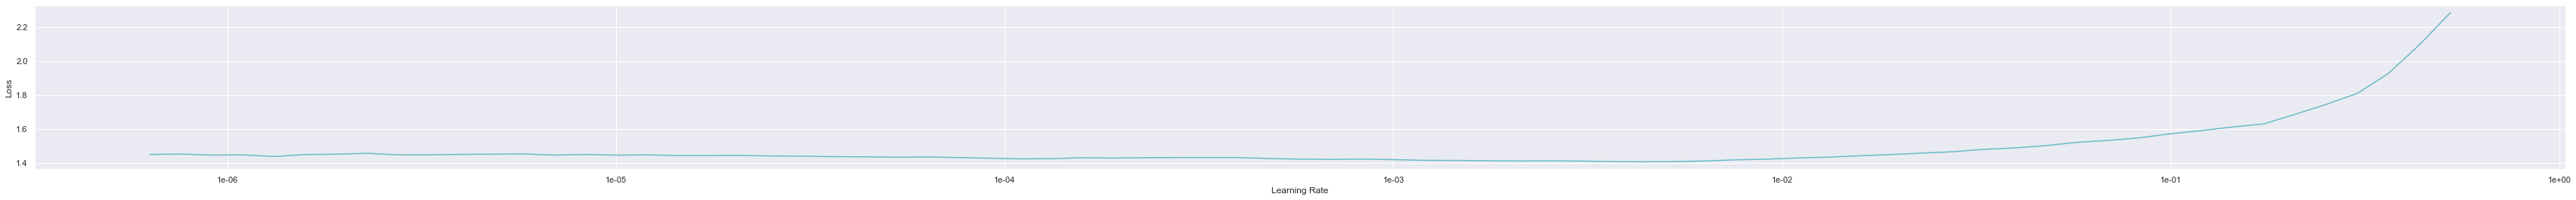

In [187]:
learn.lr_find()

# Change palette
current_palette = sns.color_palette('GnBu_d',2)
sns.set_palette(current_palette)

# Plot lr finder
learn.recorder.plot()

In [21]:
# Function to plot the evolution of train and valid accuracy with number of epochs
def plot_losses_epochs (learner, epochs):
    plt.figure(figsize=(7,5))
    plt.plot(list(range(epochs)),learner.recorder.val_losses, label='Validation loss')
    plt.plot(list(range(epochs)),[learner.recorder.losses[i] for i in range(bs-1,bs*epochs,bs)], label='Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

#### Let's check the training and validation Accuracy till now:	


In [18]:
train_acc = learn.validate(learn.data.train_dl)
valid_acc = learn.validate(learn.data.valid_dl)
print('Training Accuracy:\t',round(float(train_acc[1]),4))
print('Validation Accuracy:\t',round(float(valid_acc[1]),4))

Training Accuracy:	 0.4636
Validation Accuracy:	 0.4703


We got around 47% accuracy. Nice, but not enough.

We can choose two maximun learning rates. For the last layers, we can choose a bigger rate. For the first layers, however, we want to make sure to choose it small, way before the loss starts growing. For the intermediate layers, the learning rate will be distributed between the two given values.

In [ ]:
learn.unfreeze()
epochs = 22
np.random.seed(42)
learn.fit_one_cycle(epochs, max_lr=slice(1e-3, 1e-2))


| epoch | train_loss | valid_loss | accuracy | time |
| :- | -: | :-: | :-: | :-: |
| 0 |	1.215372 |	1.147863 |	0.562794 |	10:47
| 1 |	1.169737 |	1.200008 |	0.550078 |  10:45
| 2 |	1.179007 |	1.237502 |	0.543808 |	10:47
| 3 |	1.180250 |	1.304364 |	0.547988 |	10:48
| 4 |	1.198163 |	1.256540 |	0.554956 |	10:45
| 5 |	1.173658 |	1.242009 |	0.553388 |	10:48
| 6 |	1.140679 |	1.152339 |	0.588225 |	10:45
| 7 |	1.122158 |	1.162127 |	0.583348 |	10:48
| 8 |	1.085574 |	1.025113 |	0.623933 |	10:46
| 9 |	1.037924 |	1.050810 |	0.614179 |	10:47
| 10 |	1.013854 |	1.015028 |	0.627417 |	10:49
| 11 |	0.969796 |	1.037176 |	0.628114 |	10:45
| 12 |	0.931935 |	0.952256 |	0.649538 |	10:46
| 13 |	0.902869 |	0.973504 |	0.646577 |	10:46
| 14 |	0.859012 |	0.921534 |	0.665041 |	10:48
| 15 |	0.833176 |	0.887300 |	0.673228 |	10:49
| 16 |	0.788498 |	0.891855 |	0.679324 |	10:48
| 17 |	0.771663 |	0.900188 |	0.681066 |	10:48
| 18 |	0.732886 |	0.878847 |	0.680892 |	10:46
| 19 |	0.697520 |	0.880351 |	0.687685 |	10:48
| 20 |	0.691261 |	0.882782 |	0.689427 |	10:47
| 21 |	0.696820 |	0.879638 |	0.687859 |	10:47
				

By this, we got 69% accuracy.

Let's take a look at the evolution of our losses:

In [ ]:
plot_losses_epochs(learn, epochs=epochs)

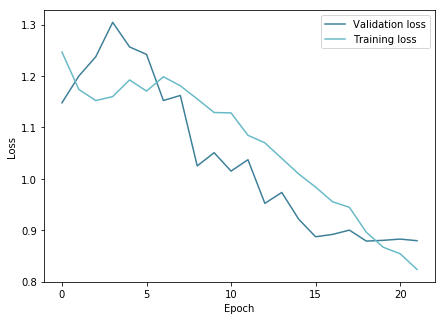

As we can see, it started overfitting towards the end.
However, the validation accuracy was still increasing. We stopped running right before the accuracy started decreasing.

Let's see some predictions:

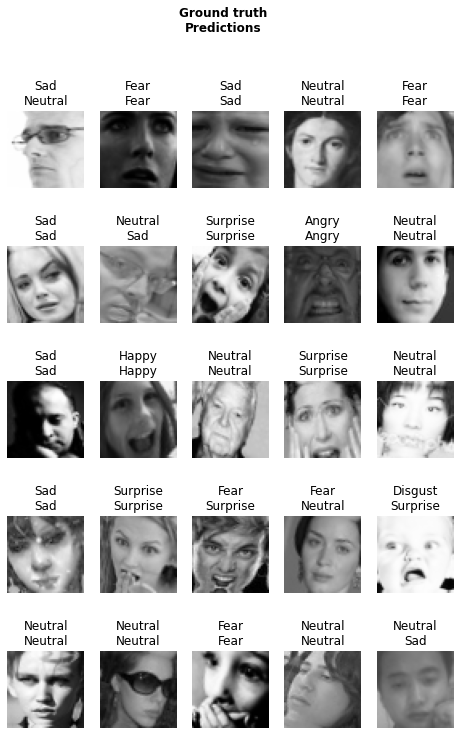

In [30]:
learn.show_results(ds_type=DatasetType.Train, figsize=(8,12))

The results in a confusion matrix:

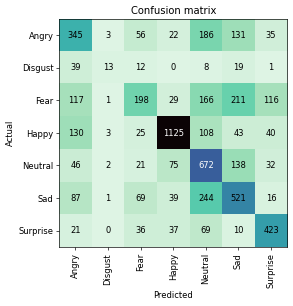

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60, cmap='mako_r')

It looks like data augmentation helped fighting the class imbalance, while earlier in the project we weren't using that technique and the class 'Disgust' wasn't being predicted well.

We can see were our maximum losses were in order to understand why the model was wrong.

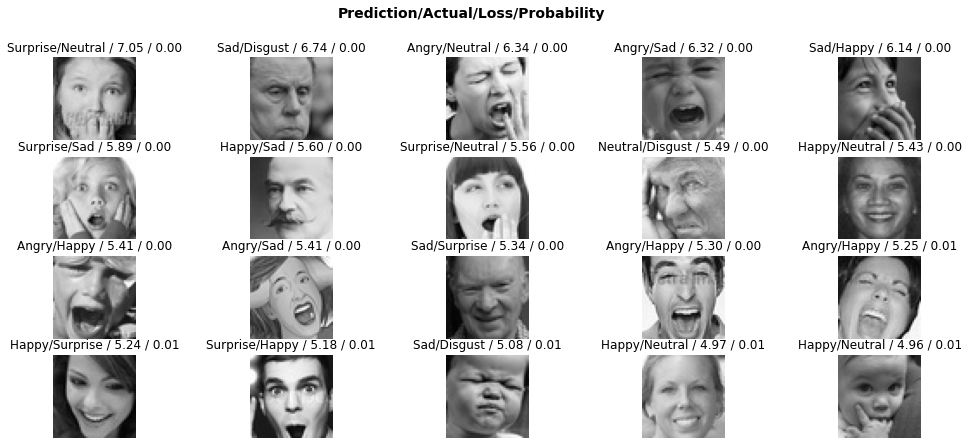

In [33]:
losses,idxs = interp.top_losses()
interp.plot_top_losses(20, figsize=(17,7))

Some of these are misinterpretations by the model, but most of them are wrong labels. So maybe the model is not too bad after all.

Let's see in what categories are we getting the bigger amount of errors:

In [34]:
interp.most_confused(min_val=90)

[('Sad', 'Neutral', 244),
 ('Fear', 'Sad', 211),
 ('Angry', 'Neutral', 186),
 ('Fear', 'Neutral', 166),
 ('Neutral', 'Sad', 138),
 ('Angry', 'Sad', 131),
 ('Happy', 'Angry', 130),
 ('Fear', 'Angry', 117),
 ('Fear', 'Surprise', 116),
 ('Happy', 'Neutral', 108)]

It looks like the biggest challenge for the model is to distinguish between neutral and sad, followed by fear and sad.

We might think that maybe we should clear the data (again) or re-labaling it, as facial expression recognition can be tricky because it is often subjective.
However, looking at the top losses, we can see that some labels are not quite right. With fastai we can delete or re-label those images from the model to increase our accuracy- but I vwon't do it because its a huge amount of datat- labeling manually a lot of images. Moreover, it's kind of a cheat to match the prediction if wer'e already know what it is, as a human. 



### CNN from Scratch

Due to the results wev'e got till now, I'll try to create my own CNN from scratch,by using residual blocks (or res-blocks), similar to what RESNET does.

#### Defining the CNN:

In [35]:
# Define res-blocks and convolutions
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [36]:
# create network
model_own = nn.Sequential(
    conv_and_res(3, 8), #24
    conv_and_res(8, 16),#12
    conv_and_res(16, 32),#6
    conv_and_res(32, 64),#3
    conv2(64, 128),#2
    nn.MaxPool2d(2,2),
    conv2(128, 256),#1
    Flatten(),
    nn.Linear(256,128),
    nn.Dropout(.5),
    nn.Linear(128,7))

In [37]:
# Define learner
learn_own = Learner(data, model_own, loss_func = nn.CrossEntropyLoss(), metrics=accuracy, model_dir='/tmp/model/')
print(learn_own.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 24, 24]          216        True      
______________________________________________________________________
ReLU                 [8, 24, 24]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 24, 24]          16         True      
______________________________________________________________________
Conv2d               [8, 24, 24]          576        True      
______________________________________________________________________
ReLU                 [8, 24, 24]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 24, 24]          16         True      
______________________________________________________________________
Conv2d               [8, 24, 24]          576        True      
___________________________________________________

The typical CNN architecture is a sequence of convolutional blocks, with certain degree of stride beween then.
Thus, the image size decreases as the network gets deeper. The convolutional part is responsible for feature extraction.

We then often place fully connected layers, that are in charge of the classification.

In out network, we have 16 layers, 14 convolutional and 2 fully connected. Let's train our new model:

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


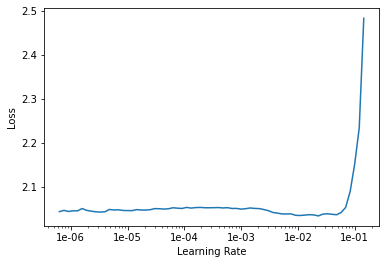

In [38]:
learn_own.lr_find()
learn_own.recorder.plot()

In [39]:
np.random.seed(42)
epochs = 37
learn_own.fit_one_cycle(epochs, max_lr=1e-2) 

epoch,train_loss,valid_loss,accuracy,time
0,1.888810,1.816292,0.249608,01:15
1,1.805893,1.769199,0.277129,01:37
2,1.765270,1.726048,0.301690,02:28
3,1.704207,1.626559,0.367532,03:03
4,1.663994,1.539885,0.408117,02:27
5,1.593742,1.554162,0.413517,02:18
6,1.563188,1.474301,0.413865,01:51
7,1.504573,1.437668,0.431458,01:49
8,1.476929,1.433666,0.434767,01:51
9,1.436297,1.380681,0.485804,01:52


In [40]:
train_acc = learn_own.validate(learn.data.train_dl)
valid_acc = learn_own.validate(learn.data.valid_dl)
print('Training Accuracy:\t',round(float(train_acc[1]),4))
print('Validation Accuracy:\t',round(float(valid_acc[1]),4))

Training Accuracy:	 0.6066
Validation Accuracy:	 0.5976


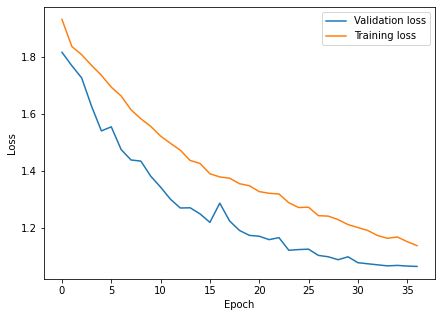

In [41]:
plot_losses_epochs(learn_own, epochs=epochs)

We got about a 60% accuracy. Not bad for doing it from scratch. We could play with some parameters (kernel size, number of layers, pooling, loss function, dropout, optimizer, etc etc etc) to increase accuracy.

### CNN Features

One of the great parts about Neural Networks is that they create features on their own.
So let's see what happens inside the convolutions and how the features are created.
To do that, we need to create what fastai calls a hook that will save the output after every block.

In [42]:
# Grab a picture
m = learn_own.model.eval()
x,y = data.train_ds[0]
xb,_ = data.one_item(x)

In [48]:
# Create a hook and save weights
def hooked_backward(y, i):
    with hook_output(m[i]) as hook_a: 
        with hook_output(m[i], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(y)].backward()
    return hook_a,hook_g

Let's take a look of our one of our images after each block. Remember that we are doing a stride 2, that's why the image gets smaller.
In exchange, we get more channels (the network gets deeper).

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


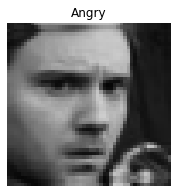

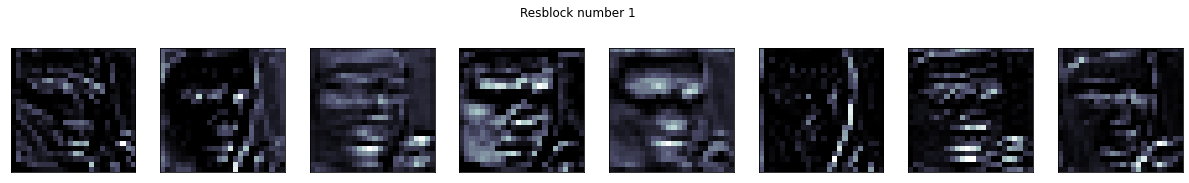

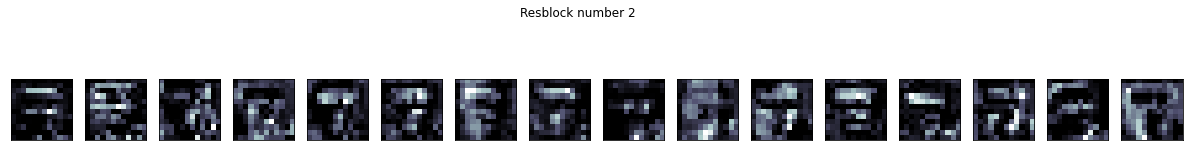

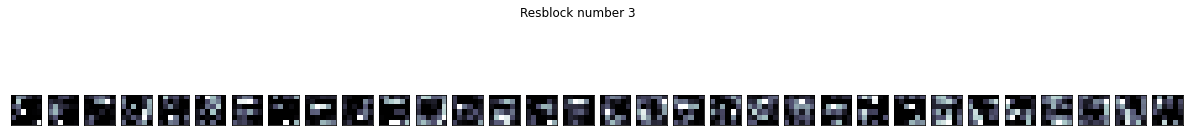

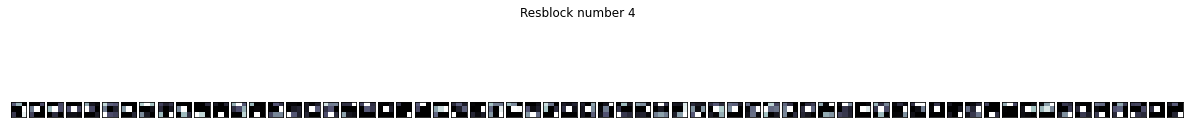

In [49]:
x.show(y=y)
for i in range(4):
    fig = plt.figure(figsize=(21,3))
    fig.suptitle('Resblock number ' + str(i+1))
    hook_a,hook_g = hooked_backward(y, i)
    acts  = hook_a.stored[0]
    for j in range(len(acts)):
        plt.subplot(1,len(acts),j+1, xticks=[], yticks=[],)
        plt.imshow(acts[j], cmap=plt.cm.bone)
plt.show()

Because the size of the images- which is pretty small (48x48 pixels), the visualizations are not as bright as the ones that can be found online, especially after the 3rd block that we cannot see much in.

From this we can see how the images are simplified to just extract the features that we want.
In the 1st row in the charch we are detecting the edges,
and in the 2nd row we can see how the network locates months and eyes, isolating them from the rest of the face. 

## Saving the Model

Now for the most important and intresting part-
After we have the model, it's time to see it in action- and to check how does it work in Prod mode.

In [54]:
learn_own.export(wd+'/export_own.pkl')
learn.export(wd+'/export.pkl')

Let's see how it predicts our test set:

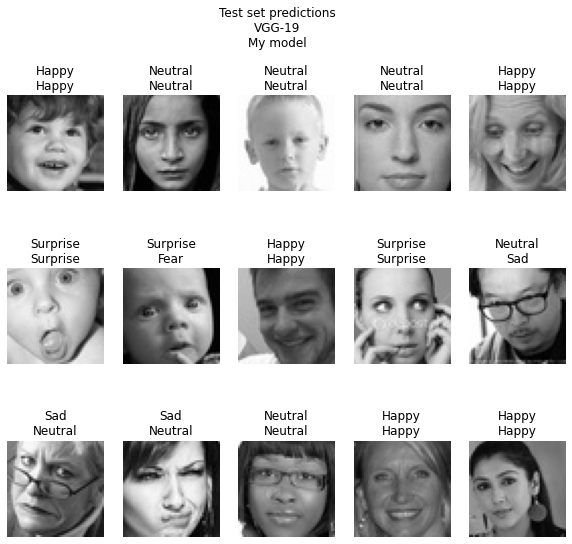

In [56]:
rand_list = random.sample(range(len(data.test_ds)), 15)
plt.figure(figsize=(10,9))
for r in rand_list:
    img = data.test_ds.x[r]
    pred_class1 = learn.predict(img)[0]
    pred_class2 = learn_own.predict(img)[0]
    ax = plt.subplot(3, 5, rand_list.index(r)+1)
    img.show(ax=ax, title = (str(pred_class1)+'\n'+str(pred_class2)))

plt.suptitle('Test set predictions\nVGG-19\nMy model')
plt.show()

Looks nice!
Some images are pretty confusing to me- I think this model is doing a better job that I'd do.

###### And now, will it predict correctly my images?
###### Here are some pictures of myself, plus 1 bonus image of... You! Dr. Alter Idan :).
###### Let's see the model in action:

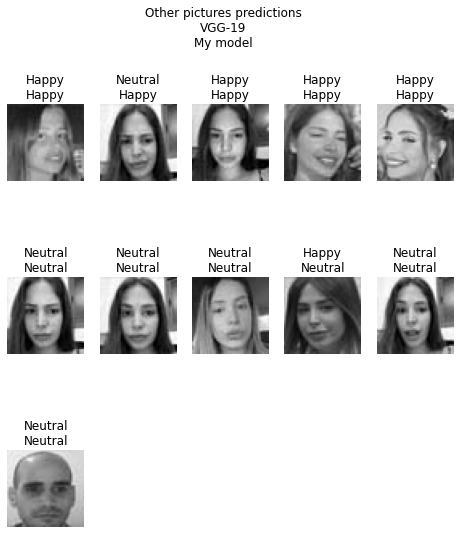

In [68]:
path3 =  'C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\LeeoriyaFaces'
os.listdir(path3)
file_list = os.listdir(path3)
random.shuffle(file_list)

plt.figure(figsize=(8,9))
for f in file_list[:12]:
    img = open_image(path3+'\\'+f)
    pred_class1 = learn.predict(img)[0]
    pred_class2 = learn_own.predict(img)[0]
    ax = plt.subplot(3, 5, file_list.index(f)+1)
    img.show(ax = ax, title=(str(pred_class1)+'\n'+str(pred_class2)))
    
plt.suptitle('Real pictures predictions\nVGG-19\nMy model\n')
plt.show()

## Results

All the results are above, each part and it's result.

The VGG-19 model achieved 69% while mine CNN achieved 60%. 

## Conclusion

* After weeks (Brutto) of working on this project, I think I achieved nice results.


* Something I was disappointed about is the major fact that I did at the end of the project only the emotions detection, instead of the whole first idea to build a model which recognize also age, gender and race. The reason for that is that I didnt have much more time to expend the project for that. Maybe in the future if I'll have time I be glad to do so, but its really disappointed me.


* By doing this project, I got to know and try some kinds of models and techniques, read a lot about them, and actually used them for this project, and saw how it really works.


* A huge advantege for me which I achived from this project is to analyze bugs and error is the code, and find their solutions. Even if it took hours to figure out some errors, it was fun (or is it masochism  ?) to search the whole net (ans stackoverflow) till I fixed it. 


* While trying to get the best results:


* I was able to succesfully extract the image features with unsupervised learning techniques. However, the classic supervised learning classification models performed poorly.


* Pre-trained CNN models performed pretty well and fast (low number of epochs- not fast from the running time aspect). As said in the results section- the model succedd to classify emotions with 69% accuracy.


* CNN from scratch that performed pretty well, with an accuracy over 60%. However, the training process was longer, needing more epochs to achieve the aforementioned accuracy.


## Improvement ideas and personal notes

* First of all- self improvement idea- conitune with the project till and include the age, gender and race recognition.


* Maybe use other datasets with better labels and higher image resolution.


* Another idea is the spliting validation set. I  mostly used a random function to split my training/validation set. This may affect model's accuracy.


* Much more important: improve running time!!! some parts of the code took more than 2 hourse to be final compiled.


* In the pre-trained models, we can introduce weights obtained training facial features of other datasets (e.g. VGG-Face that works with VGG-16).


* Improve our own model: changing achitecture, use the model to predict facial emotions in videos.

###### Thanks for reading!